In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df0 = pd.read_csv('kino.txt', skiprows=4, sep='\s+')

In [3]:
df0.head()

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,22/01/2019,16:00,278.0,274.0,18.59,30.2,17.3,40.0,1018.3,0.0,262.3
1,22/01/2019,17:00,293.0,285.0,15.19,25.9,18.9,30.0,1019.0,0.0,550.7
2,22/01/2019,18:00,249.0,240.0,20.45,36.4,19.6,32.0,1019.0,0.0,649.5
3,22/01/2019,19:00,257.0,252.0,27.09,47.5,20.0,31.0,1018.5,0.0,762.8
4,22/01/2019,20:00,275.0,282.0,29.50,47.9,20.7,24.0,1017.8,0.0,744.0


In [4]:
df = pd.DataFrame(df0)

In [5]:
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS          float64
DIRR          float64
VELS          float64
VELR          float64
TEMP          float64
HR            float64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [6]:
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,278.0,274.0,18.59,30.2,17.3,40.0,1018.3,0.0,262.3,2019-01-22 16:00:00
1,293.0,285.0,15.19,25.9,18.9,30.0,1019.0,0.0,550.7,2019-01-22 17:00:00
2,249.0,240.0,20.45,36.4,19.6,32.0,1019.0,0.0,649.5,2019-01-22 18:00:00
3,257.0,252.0,27.09,47.5,20.0,31.0,1018.5,0.0,762.8,2019-01-22 19:00:00
4,275.0,282.0,29.50,47.9,20.7,24.0,1017.8,0.0,744.0,2019-01-22 20:00:00


In [8]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,139.000000,139.000000,139.000000,137.000000,137.000000,136.000000,136.000000,136.0,136.000000
mean,234.237410,247.760432,16.271727,26.430657,15.961314,46.036765,1016.168382,0.0,182.464706
std,87.600425,130.018560,23.113150,12.796930,4.311054,15.273025,2.777814,0.0,268.626997
min,18.000000,1.000000,-1.000000,6.100000,5.500000,17.000000,1011.700000,0.0,-1.000000
25%,243.000000,243.500000,6.145000,13.300000,13.100000,35.000000,1013.775000,0.0,-1.000000
50%,267.000000,270.000000,15.770000,27.000000,16.000000,44.000000,1015.900000,0.0,-1.000000
75%,281.500000,284.500000,20.495000,35.600000,19.500000,57.000000,1017.725000,0.0,322.575000
max,347.000000,1017.600000,266.700000,55.400000,24.000000,82.000000,1022.800000,0.0,771.300000


In [9]:
df_tmp = df[df.TEMP > 24]
df_select = df_tmp[df_tmp.TEMP <25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA


In [10]:
df.mean()

DIRS       234.237410
DIRR       247.760432
VELS        16.271727
VELR        26.430657
TEMP        15.961314
HR          46.036765
PB        1016.168382
PREC         0.000000
RADSOL     182.464706
dtype: float64

In [11]:
df.TEMP.mean()

15.961313868613148

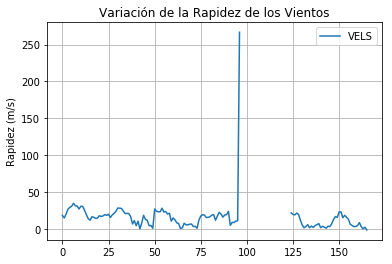

In [28]:
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.savefig('grafica1')
plt.show()

<Figure size 432x288 with 0 Axes>

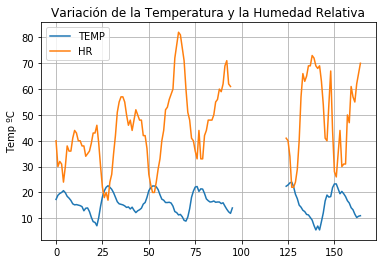

In [20]:
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC")
plt.savefig('grafica2')
plt.grid(True)
plt.show()

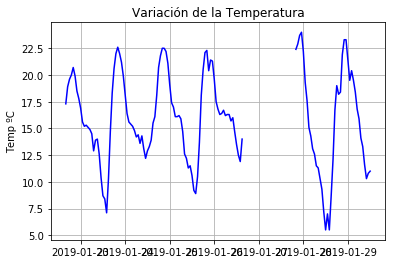

In [21]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.savefig('grafica3')
plt.show()


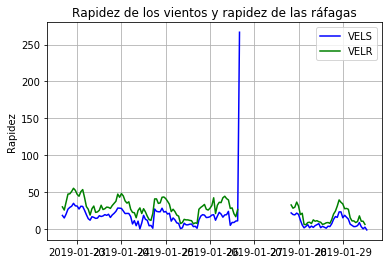

In [22]:
plt.plot_date(x=df.FECHA, y=df.VELS,fmt="b-", xdate=True);plt.legend(loc='best')
plt.plot_date(x=df.FECHA, y=df.VELR,fmt="g-", xdate=True);plt.legend(loc='best')
plt.title("Rapidez de los vientos y rapidez de las ráfagas")
plt.ylabel("Rapidez")
plt.grid(True)
plt.savefig('grafica4')
plt.show()

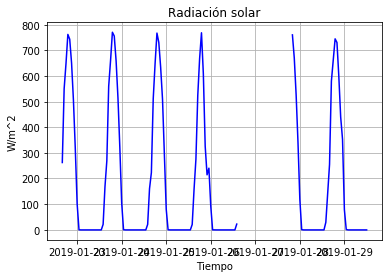

In [24]:
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="b-")
plt.title("Radiación solar")
plt.ylabel("W/m^2")
plt.xlabel("Tiempo")
plt.grid(True)
plt.savefig('grafica5')
plt.show()

In [18]:
##Rango de Temperaturas
rangoT = df.TEMP.max()-df.TEMP.min()
rangoT

18.5

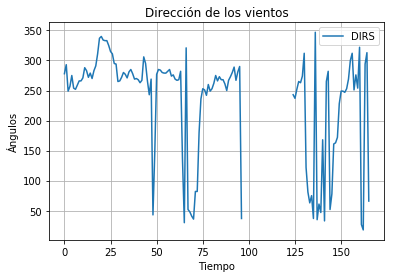

In [29]:
plt.figure(); df.DIRS.plot(); plt.legend(loc='best')
plt.title("Dirección de los vientos")
plt.ylabel("Ángulos")
plt.xlabel("Tiempo")
plt.grid(True)
plt.savefig('grafica6')
plt.show()

In [27]:
df.describe()


,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,139.000000,139.000000,139.000000,137.000000,137.000000,136.000000,136.000000,136.0,136.000000
mean,234.237410,247.760432,16.271727,26.430657,15.961314,46.036765,1016.168382,0.0,182.464706
std,87.600425,130.018560,23.113150,12.796930,4.311054,15.273025,2.777814,0.0,268.626997
min,18.000000,1.000000,-1.000000,6.100000,5.500000,17.000000,1011.700000,0.0,-1.000000
25%,243.000000,243.500000,6.145000,13.300000,13.100000,35.000000,1013.775000,0.0,-1.000000
50%,267.000000,270.000000,15.770000,27.000000,16.000000,44.000000,1015.900000,0.0,-1.000000
75%,281.500000,284.500000,20.495000,35.600000,19.500000,57.000000,1017.725000,0.0,322.575000
max,347.000000,1017.600000,266.700000,55.400000,24.000000,82.000000,1022.800000,0.0,771.300000
